## Práctica Calificada - Semana 1

Este es el primer entregable calificado. Debe completar todos los ejercicios para obtener un 100% en la calificación. Recuerde que tiene hasta el próximo viernes a medianoche para entregar el ejercicio en el aula virtual. 

Forma de entrega: por favor coloque el archivo Practica-Semana1-ipynb en un .zip con el figuiente formato:
- primera-letra-nombre.apellido-semana.zip 
- (por ejemplo, Juan Zamora debe entregar el archivo j.zamora-1.zip) La tarea debe subirse al aula virtual.


In [1]:
# 1 [COMPLETE] - imports: ponga todos sus imports en esta seccion: (1pt)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.ticker as tkr

In [2]:
# utilizaremos Pandas para cargar los datos de un CSV

data = pd.read_csv("data/precios-casas-1.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Ajuste

In [3]:
# AJUSTE [COMPLETE] (1pt)
# Las indicaciones estan en la Parte 3. (no resuelva esto sin haber completado 
# la Parte 1 y 2)

# el ajuste debe realizarse sobre la variable data.

data = data.sort_values(by='sqft_living', ascending=False)
data = data.drop(data.index[0])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345


## Parte 1: Training Set

In [4]:
# 2 [COMPLETE] (1pt)
# - separe el dataset (data) en train (con 80%) y test set (con 20%) de los datos
# y = precio, X = sqft_living
# Se obtienen las variables X y Y
x = data['sqft_living']
y = data['price']
# Se separan los datos de test y training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

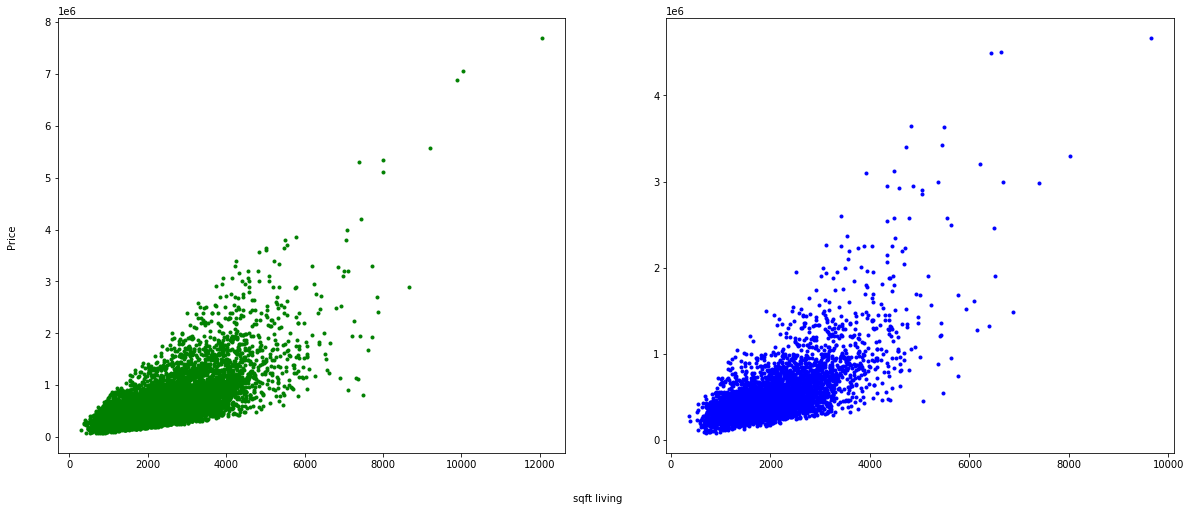

In [5]:
# 3 [COMPLETE] (3pt)
# despliegue el train set y el test set con matplotlib. Despliegue los charts usando
# scatter plots con puntos verdes para el training set y azules para el test set.
# ambos charts deben desplegarse de forma horizonal (uno al lado del otro)
fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(20, 8))

fig1.scatter(x_train.values,y_train.values,marker=".",c="green")
fig2.scatter(x_test.values,y_test.values,marker=".",c="blue")

fig.text(0.5, 0.04, 'sqft living', ha='center')
fig.text(0.09, 0.5, 'Price', va='center', rotation='vertical')

plt.show()


In [14]:
# 4 [COMPLETE] (2pt)
# utilize Sklearn para generar el modelo de regresion lineal sobre el training set.
# imprima el valor de los coeficientes
x_reshaped = x_train.values.reshape(-1,1)
y_reshaped = y_train.values.reshape(-1,1)
model = LinearRegression().fit(x_reshaped, y_reshaped)

b_1 = model.coef_[0]
b_0 = model.intercept_
rss = np.sum((y - b_0 - b_1 * x)**2)

print("b0:",b_0, "b1:", b_1, "rss:", rss)

b0: [-43508.56819594] b1: [280.76679371] rss: 1475094994024931.8


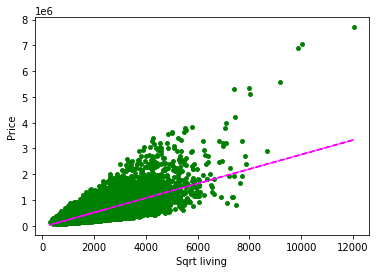

In [15]:
# 5 [COMPLETE] (2pt)
# despliegue con Matplotlib el trainig set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color magenta a la linea de regresion.

plt.scatter(x_reshaped,y_reshaped, marker = ".", s = 60, c = "green")
plt.xlabel("Sqrt living")
plt.ylabel("Price")

# aqui estimamos la linea de regresion con unos parametros beta inventados.
y_prima = model.predict(x_reshaped)

# desplegamos el modelo que minimiza RSS
plt.plot(x_reshaped, y_prima, 'r--', c = "magenta")
plt.show()

In [16]:
# 6 [COMPLETE] (1pt)
# calcule el MSE del training set
mse_train = mean_squared_error(y_train.values.reshape(-1,1), y_prima)

#Dejé esta línea comentada para primero calcular el mse train y luego del ajuste ejecutar esta linea y así tener ambas variables
#mse_train_adj = mean_squared_error(y_train.values.reshape(-1,1), y_prima)

print("MSE:",mse_train)

MSE: 68042106635.22671


## Parte 2: Test Set

In [17]:
# 7 [COMPLETE] (1pt)
# Aplique el modelo generado (en el paso #4) sobre el test set. 
# Aqui debe generar la prediccion sobre el test set usando el modelo ya generado.

# y_prima_test = modelo.predecir(...)
x_test_reshaped = x_test.values.reshape(-1,1)
y_test_reshaped = y_test.values.reshape(-1,1)

y_prima_test = model.predict(x_test_reshaped)


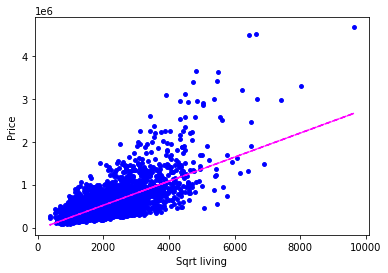

In [18]:
# 8 [COMPLETE] (2pt)
# despliegue con Matplotlib el test set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color naranja a la linea de regresion.
plt.scatter(x_test_reshaped,y_test_reshaped, marker = ".", s = 60, c = "blue")
plt.xlabel("Sqrt living")
plt.ylabel("Price")

# desplegamos el modelo que minimiza RSS
plt.plot(x_test_reshaped, y_prima_test, 'r--', c = "magenta")

plt.show()

In [19]:
# 9 [COMPLETE] (1pt)
# calcule el MSE del test set
mse_test = mean_squared_error(y_test.values.reshape(-1,1), y_prima_test)

#Dejé esta línea comentada para primero calcular el mse train y luego del ajuste ejecutar esta linea y así tener ambas variables
#mse_test_adj = mean_squared_error(y_test.values.reshape(-1,1), y_prima_test)

print("MSE:",mse_test)

MSE: 69099008190.72334


## Parte 3: Ajuste del Problema.

In [20]:
# 10 [COMPLETE] (5pt)
# Existe un problema con los datos que afecta el modelo de regresion lineal. 
# Considere eliminar los datos que ud considere que estan dando problemas y
# vuelva a ejecutar los pasos del 1 al 9.
# PISTA: son 2 datos que afectan el modelo...

# es importante que este ajuste se realize en la casilla de AJUSTE, que esta antes
# de la Parte 1.

# antes de realizar el ajuste, salve el MSE_train y el MSE_test en variables para 
# que pueda comparar estos datos despues del ajuste

# Obtenga: 
# MSE_train
# MSE_train_adj
# MSE_test
# MSE_test_adj

#Resultados antes del ajuste
#MSE trining:  66319347784.51793
#MSE test:  76453457071.91766

#Resultados con el ajuste
#MSE trining:  68042106635.22671
#MSE test:  69082867873.39961


print("MSE trining: ", mse_train)
#print("MSE trining ADJ: ", mse_train_adj)

print("MSE test: ", mse_test)
#print("MSE test ADJ: ", mse_test_adj)

MSE trining:  68042106635.22671
MSE test:  69099008190.72334
